In [4]:
from skimage import feature
import numpy as np
import pandas as pd
class LocalBinaryPatterns:
    def __init__(self, radius):
        # store the number of points and radius
        self.numPoints = 8 * radius
        self.radius = radius
    def describe(self, image, eps=1e-7):
        # compute the Local Binary Pattern representation
        # of the image, and then use the LBP representation
        # to build the histogram of patterns
        lbp = feature.local_binary_pattern(image, self.numPoints,
            self.radius, method="uniform")
        (hist, _) = np.histogram(lbp.ravel(),
            bins=np.arange(0, self.numPoints + 3),
            range=(0, self.numPoints + 2))
        # normalize the histogram
        hist = hist.astype("float")
        hist /= (hist.sum() + eps)
        return hist


In [5]:
#pip install imutils

Image : a0001.jpg


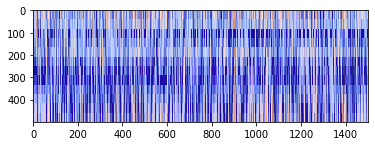

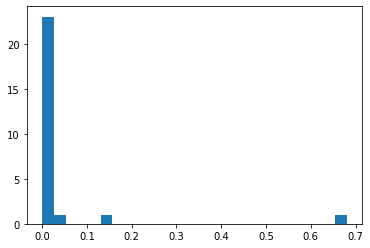

------------------------------------------------------------------------------------------
Image : a0003.jpg


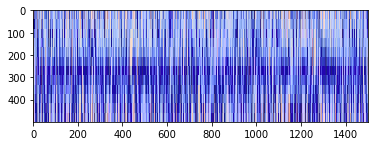

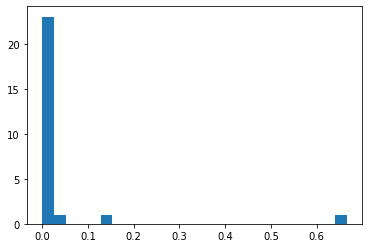

------------------------------------------------------------------------------------------
Image : a0002.jpg


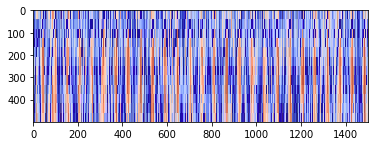

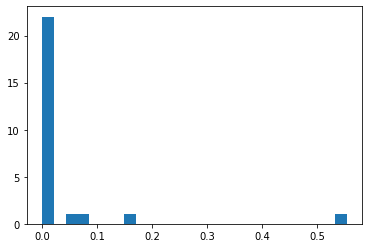

------------------------------------------------------------------------------------------
Image : a0005.jpg


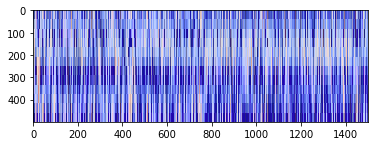

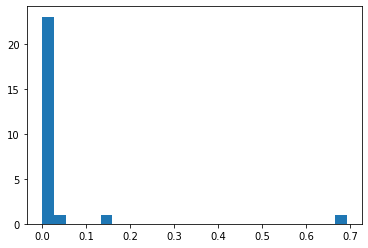

------------------------------------------------------------------------------------------
Image : a0004.jpg


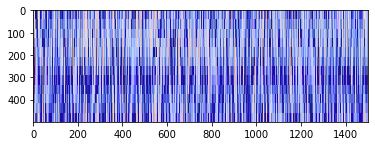

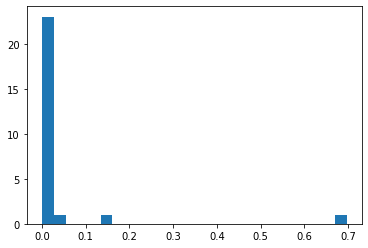

------------------------------------------------------------------------------------------


In [6]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from imutils import paths
import cv2
import os

desc = LocalBinaryPatterns(3)
df  = pd.DataFrame(columns=['image_name']+[i for i in range(0,26)])
pd.merge(df['image_name'],df)
data = []
images_name = []
folder = 'Images/'
for i in range(0,len(os.listdir('Images/'))):
    img = os.listdir('Images/')[i]
    #print(img)
    image = cv2.imread('Images/'+img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = desc.describe(gray)
    data.append(hist)
    df = df.append(data, ignore_index=True)
    images_name.append(img)
    
    print("Image : "+img)
    plt.imshow(image) 
    plt.show() 
    
    plt.hist(data,bins=26)
    plt.show()
    print("-"*90)
    
    data.clear()

df['image_name'] = images_name

In [7]:
df

,image_name,0,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,24,25
0,a0001.jpg,0.008427,0.023360,0.004363,0.001892,0.000773,0.000708,0.000255,0.001055,0.000624,...,0.000824,0.013936,0.000729,0.014852,0.001248,0.012849,0.004519,0.021633,0.135028,0.679891
1,a0003.jpg,0.008771,0.022776,0.005755,0.002293,0.000944,0.000749,0.000311,0.000997,0.000648,...,0.000845,0.014415,0.000640,0.015633,0.001197,0.015189,0.005787,0.022583,0.147423,0.665012
2,a0002.jpg,0.008824,0.014032,0.012753,0.003036,0.001517,0.001147,0.000544,0.001488,0.001692,...,0.001691,0.014211,0.001227,0.019883,0.001757,0.011853,0.010133,0.019860,0.162613,0.552761
3,a0005.jpg,0.008635,0.024005,0.004321,0.001807,0.000761,0.000563,0.000220,0.001019,0.000440,...,0.000831,0.013301,0.000619,0.015288,0.001064,0.014696,0.004203,0.022800,0.138113,0.691905
4,a0004.jpg,0.008883,0.023529,0.003883,0.001828,0.000672,0.000697,0.000237,0.001065,0.000533,...,0.000824,0.013465,0.000597,0.015107,0.001096,0.012764,0.003643,0.022337,0.134980,0.696455


In [8]:
df.to_csv("images.csv")

## ALBP

In [43]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 
import os


def get_pixel(img, center, x, y,avg): 

    new_value = 0

    try: 
        # If local neighbourhood pixel 
        # value is greater than or equal 
        # to center pixel values then 
        # set it to 1 
        if img[x][y] >= avg: 
            new_value = 1

    except: 
        # Exception is required when 
        # neighbourhood value of a center 
        # pixel value is null i.e. values 
        # present at boundaries. 
        pass

    return new_value 


def get_neighbor(img, x, y): 
    
    neighbor = 0 

    try: 
        # If local neighbourhood pixel 
        # value is greater than or equal 
        # to center pixel values then 
        # set it to 1 
        neighbor = img[x][y]

    except: 
        # Exception is required when 
        # neighbourhood value of a center 
        # pixel value is null i.e. values 
        # present at boundaries. 
        pass

    return neighbor 

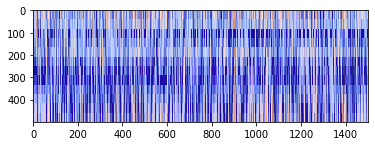

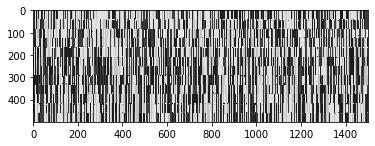

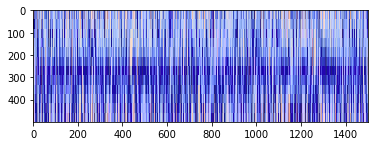

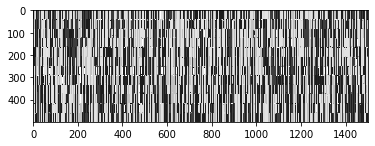

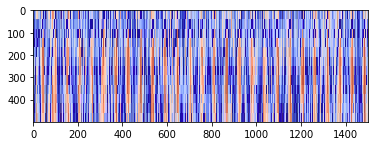

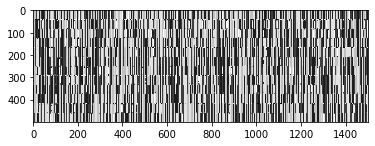

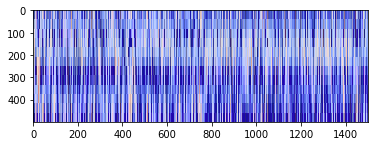

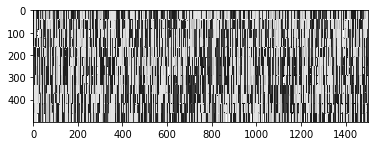

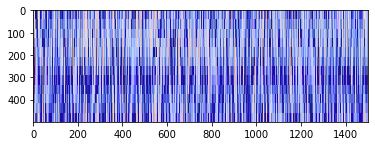

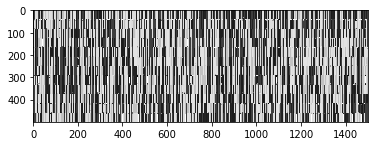

In [45]:
# Function for calculating ALBP 
def lbp_calculated_pixel(img, x, y): 

    center = img[x][y] 

    val_ar = [] 
    neighbor_avg = []
    
    #top_left
    neighbor_avg.append(get_neighbor(img, x-1, y-1)) 
    
    #top
    neighbor_avg.append(get_neighbor(img, x-1, y)) 
    
    #top_right
    neighbor_avg.append(get_neighbor(img, x-1, y+1)) 
    
    #right
    neighbor_avg.append(get_neighbor(img, x, y+1)) 
    
    #bottom_right
    neighbor_avg.append(get_neighbor(img, x+1, y+1)) 
    
    #bottom
    neighbor_avg.append(get_neighbor(img, x+1, y)) 
    
    #bottom_left
    neighbor_avg.append(get_neighbor(img, x+1, y-1)) 
    
    #left
    neighbor_avg.append(get_neighbor(img, x, y-1)) 
    
    #Average of neighbor
    neighbors_avg = sum(neighbor_avg)/len(neighbor_avg)

    # top_left 
    val_ar.append(get_pixel(img, center, x-1, y-1,neighbors_avg)) 

    # top 
    val_ar.append(get_pixel(img, center, x-1, y,neighbors_avg)) 

    # top_right 
    val_ar.append(get_pixel(img, center, x-1, y + 1,neighbors_avg)) 

    # right 
    val_ar.append(get_pixel(img, center, x, y + 1,neighbors_avg)) 

    # bottom_right 
    val_ar.append(get_pixel(img, center, x + 1, y + 1,neighbors_avg)) 

    # bottom 
    val_ar.append(get_pixel(img, center, x + 1, y,neighbors_avg)) 

    # bottom_left 
    val_ar.append(get_pixel(img, center, x + 1, y-1,neighbors_avg)) 

    # left 
    val_ar.append(get_pixel(img, center, x, y-1,neighbors_avg)) 

    # Now, we need to convert binary 
    # values to decimal 
    power_val = [1, 2, 4, 8, 16, 32, 64, 128] 

    val = 0

    for i in range(len(val_ar)): 
        val += val_ar[i] * power_val[i] 

    return val 

df  = pd.DataFrame(columns=['image_name']+[i for i in range(0,26)])
pd.merge(df['image_name'],df)
images_name = []
data = []
folder = 'Images/'
for i in range(0,len(os.listdir('Images/'))):
    img = os.listdir('Images/')[i]
    img_bgr = cv2.imread('Images/'+img, 1) 
    height, width, _ = img_bgr.shape 
    img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY) 
    img_lbp = np.zeros((height, width),np.uint8) 
    
    for i in range(1, height): 
        for j in range(1, width): 
            img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j) 
    
    eps=1e-7
    (hist, _) = np.histogram(img_lbp.ravel(),bins=np.arange(0, 27))
    
    hist = hist.astype("float")
    hist /= (hist.sum() + eps)
    data.append(hist)
    df = df.append(data, ignore_index=True)
    images_name.append(img)
    
    plt.imshow(img_bgr) 
    plt.show() 

    plt.imshow(img_lbp, cmap ="gray") 
    plt.show() 

    data.clear()

df['image_name'] = images_name


In [46]:
df

,image_name,0,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,24,25
0,a0001.jpg,0.543946,0.006259,0.004354,0.021497,0.004626,0.014422,0.019048,0.152109,0.000544,...,0.004082,0.001905,0.008163,0.005442,0.003810,0.004626,0.005986,0.006259,0.014966,0.048435
1,a0003.jpg,0.474822,0.004038,0.002613,0.021853,0.007363,0.016627,0.022803,0.199287,0.000950,...,0.006888,0.001663,0.005463,0.004276,0.003563,0.004988,0.009739,0.006888,0.021140,0.031829
2,a0002.jpg,0.374345,0.009363,0.004869,0.035206,0.012172,0.013296,0.031086,0.239700,0.000936,...,0.010861,0.003558,0.006367,0.006554,0.006742,0.005243,0.010487,0.008614,0.031086,0.032584
3,a0005.jpg,0.537077,0.005373,0.002687,0.021494,0.004567,0.018270,0.022031,0.149113,0.000269,...,0.002149,0.000000,0.006717,0.003493,0.002955,0.004567,0.005105,0.006179,0.011016,0.036539
4,a0004.jpg,0.576912,0.003175,0.003175,0.018470,0.003463,0.013564,0.020491,0.129004,0.000289,...,0.001443,0.001443,0.005195,0.002886,0.002886,0.003752,0.004906,0.006061,0.008081,0.040404


In [47]:
df.to_csv("ALBP_images.csv")